<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-proditorIF/blob/main/Sep1-2/Ej_Sep_2_BRM_McL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning/Alma
### Ejercicio 2/Sep
Instrucciones:
Para el conjunto , las columnas corresponden a Tamaño de la casa, número de habitaciones, número de pisos, años de antigüedad y costo.
Para dicho conjunto de datos realizar lo siguiente:

1- Explorar los datos, realiza gráficas del costo de las casas como función de cada característica.

2- Ajustar un modelo lineal usando todas las características, usando el método de gradiente descendiente. Determinar el valor del parámetro de aprendizaje que mejor funciona para este caso.

3- Normaliza las características y ajusta un nuevo modelo lineal, nuevamente determina el valor del parámetro de aprendizaje.

4-Usa el modelo obtenido para predecir el valor de una casa con las siguientes características : tamaño=1200, num. habitaciones=3, pisos=1, años=4

In [1]:
#Caso simple para grado 1
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
file ="/content/drive/MyDrive/Machine_Learn/houses.txt"
data=np.loadtxt(file,delimiter=",").T
#Asigamos los datos
tam = data[0]
Nh = data[1]
Np = data[2]
ant = data[3]
hcost = data [4]

Mounted at /content/drive


1-Primero se estudia la relación de cada variable con el costo

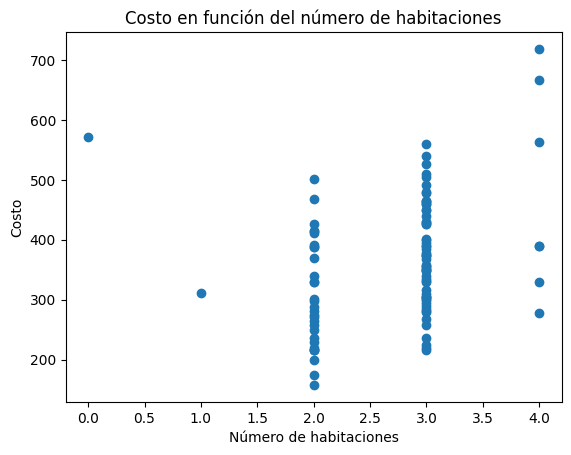

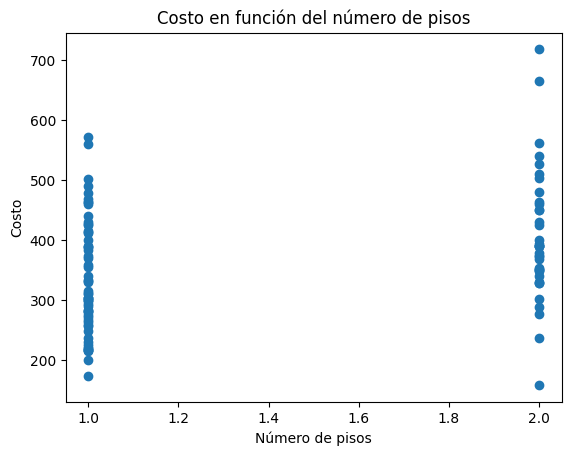

El vector W encontrado es [0.01783569 0.25309624]


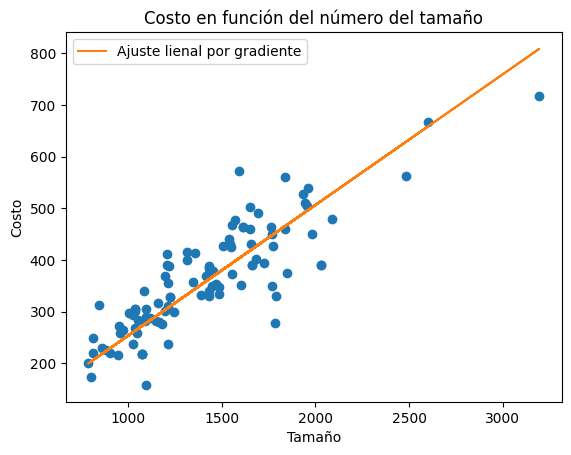

In [3]:
#Se Define la función que calcula las derivas de L en base a los pesos
def DW(x, t,W):
  N= 1/len(x)
  #Se construye la matriz
  X=np.vstack([np.ones_like(x)])
  for i in range(1,len(W)):
    Xa=np.vstack([x**i])
    X=np.concatenate([X, Xa])
  #Se calculan las derivadas
  Dw0=(N)*(np.sum((X.T @ W-t)))
  DW1=(N)*(np.sum((X.T @ W-t) @ X.T))
  return Dw0,DW1

#Función que cualcula el costo en base a los pesos prprocionados
def cost(x, t,W):
  N= 1/len(x)
  #Se construye la matriz
  X=np.vstack([np.ones_like(x)])
  for i in range(1,len(W)):
    Xa=np.vstack([x**i])
    X=np.concatenate([X, Xa])
  #Se calcula el valor de la función costo
  Cost=(N)*(np.sum((X.T @ W-t)**2))
  return Cost
#Función para el gradiente
def Lgrad1 (x,t,w,a):
  W=w
  C= cost(x,t,W)
  for i in range(100000):
    D=DW(x,t,W)
    W[0]-=a*D[0]
    W[1]-=a*D[1]
  return W
# Número de habitaciones
plt.title("Costo en función del número de habitaciones")
plt.plot(Nh,hcost,'o')
plt.xlabel("Número de habitaciones")
plt.ylabel("Costo")
plt.show()
# Número de pisos
plt.title("Costo en función del número de pisos")
plt.plot(Np,hcost,'o')
plt.xlabel("Número de pisos")
plt.ylabel("Costo")
plt.show()
# Tamaño
W=np.zeros(2)
W[0]=0
W[1]=0
atam = 0.00000004
rnh = Lgrad1(tam,hcost,W,atam)
print("El vector W encontrado es",rnh)
Ytam=rnh[0]+rnh[1]*tam
plt.title("Costo en función del número del tamaño")
plt.plot(tam,hcost,'o')
plt.plot(tam,Ytam,label="Ajuste lienal por gradiente")
plt.legend()
plt.xlabel("Tamaño")
plt.ylabel("Costo")
plt.show()


El vector W encontrado es [549.28183827  -4.07862389]


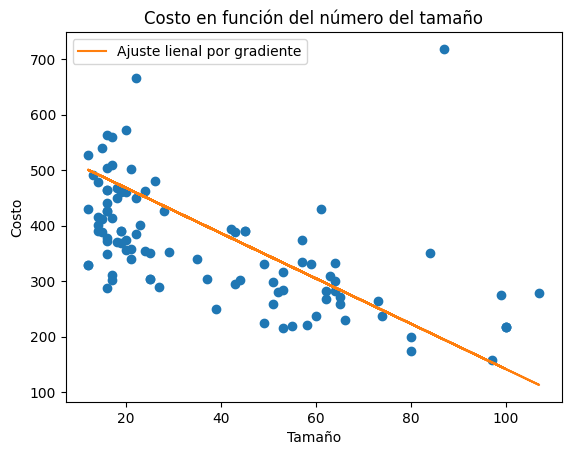

In [4]:
# Antigüedad
W[0]=550
W[1]=20
aant = 0.0000001
rant = Lgrad1(ant,hcost,W,aant)
print("El vector W encontrado es",rant)
Yant=rant[0]+rant[1]*ant
plt.title("Costo en función del número del tamaño")
plt.plot(ant,hcost,'o')
plt.plot(ant,Yant,label="Ajuste lienal por gradiente")
plt.legend()
plt.xlabel("Tamaño")
plt.ylabel("Costo")
plt.show()

### 2 Gradiente para mas de un parámetro.

In [89]:
def DWa(p, t,W):
  N= 1/len(t)
  #Se construye la matriz
  X=np.vstack([np.ones_like(t)])
  X=np.concatenate([X, p])
  #Se calculan las derivadas
  Dw0=(N)*(np.sum((X.T @ W-t)))
  DW = np.zeros(len(W)-1)
  for i in range (0,len(W)-1):
    DW[i]=(N)*(np.sum((X.T @ W-t) @ (X.T[:,i+1])))
  return Dw0,DW
#Función para calcular el costo
def cost(p,t,W):
  N= 1/len(t)
  #Se construye la matriz
  X=np.vstack([np.ones_like(t)])
  X=np.concatenate([X, p])
  #Se calcula el valor de la función costo
  Cost=(N)*(np.sum((X.T @ W-t)**2))
  return Cost
def Lgrad1 (p,t,w,a):
  W=w
  C= np.zeros(1)
  for i in range(100000):
    D=DWa(p,t,W)
    D0=D[0]
    D1=D[1]
    W[0]-=a*D0
    for j in range(0,len(w)-1):
      W[j+1]-=a*D1[j]
  cf= cost(p,t,W)
  return cf
#Se separan los parámetros
param = data[:4,:]
W5 = np.zeros(5)
pa = 0.0000009
ajh = Lgrad1(param,hcost,W5,pa)
print("El costo es:",ajh)

El costo es: 2656.3431482909696


# 3 Normalizar los datos
Empleando la formúla $\quad d_{norm} = \frac{d-\mu}{\sigma}$


In [119]:
def Lgrad2(p,t,w,a):
  W=w
  C= np.zeros(1)
  for i in range(200000):
    D=DWa(p,t,W)
    D0=D[0]
    D1=D[1]
    W[0]-=a*D0
    for j in range(0,len(w)-1):
      W[j+1]-=a*D1[j]
  cf= cost(p,t,W)
  return cf,W
#Se normalizan los datos
datanorm = (data-np.mean(data))/np.std(data)
paramn = datanorm[:4,:]
W5 = np.zeros(5)
pa = 0.3
ajh1 = Lgrad2(paramn,hcost,W5,pa)
print("El costo es:",ajh1[0])

El costo es: 1460.1819703030214


### 4 En base a los W obtenidos predecir un valor de costo

In [133]:
t1 = 1200
Nh1 = 3
Np1 = 1
ant1 = 4
wa = ajh1[1]
pred = wa[0]+wa[1]*t1+wa[2]*Nh1+wa[3]*Np1+wa[4]*ant1
print("Segun la predicción una casa de 3 habitaciones, una planta, 1200m^2 de extensión y 4 años de antiguedad tendria un costo de :$",pred)

Segun la predicción una casa de 3 habitaciones, una planta, 1200m^2 de extensión y 4 años de antiguedad tendria un costo de :$ 126323.19458693314
